In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
from sklearn.decomposition import KernelPCA
from numba import jit, prange
import seaborn as sns
import pandas as pd
import umap

%matplotlib inline

In [2]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')
length = 20000
spike_data_t = spike_data[:,0:length]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]
print(spike_data.shape)

(336, 10000)
(336, 10000)


In [3]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
print(scaled_data.shape)
scaled=pd.DataFrame.to_numpy(scaled_data)

(336, 10000)


In [8]:
r = 100
Umap = umap.UMAP(n_neighbors=100,n_components=r,random_state=42)

embedding = Umap.fit_transform(scaled.T).T
print(embedding.shape)

(100, 10000)


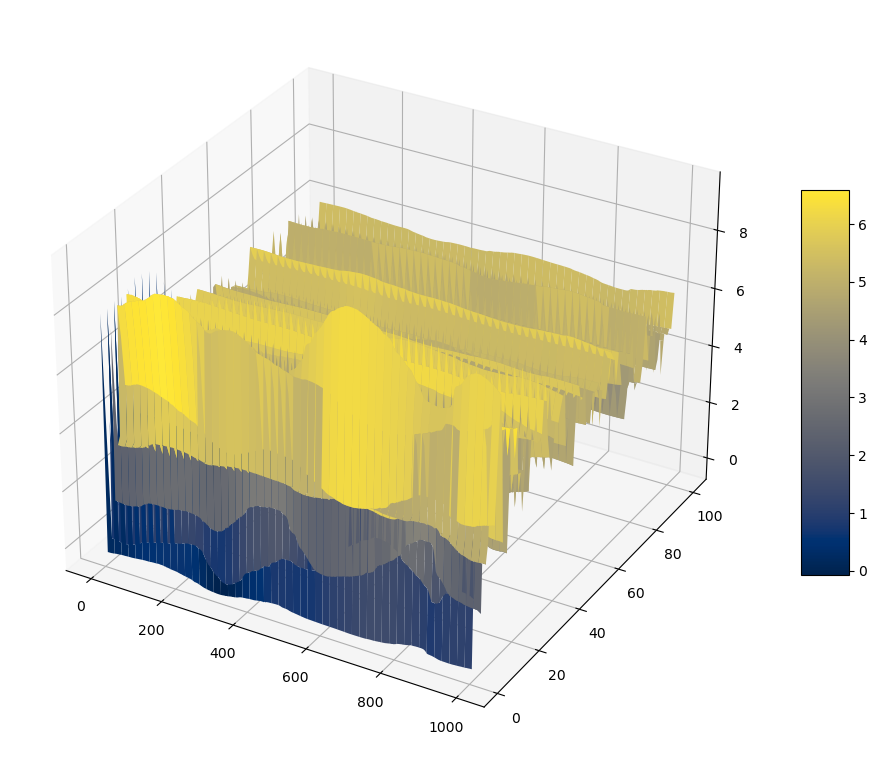

In [9]:
#%matplotlib qt
dims=100
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, embedding[0:dims,:1000], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [11]:
np.save('../data/smooth_spike_UMAP_proj_10k', embedding)

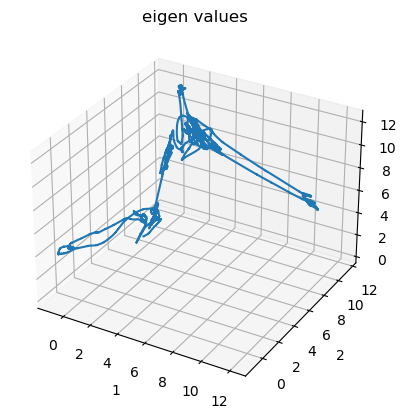

In [12]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(embedding[0,:],embedding[1,:],embedding[2,:])

ax.set(xlabel='1', ylabel='2',
       title='eigen values')
plt.show()